In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('data_vaksin.csv', encoding='latin-1' )

In [3]:
data

,data,nilai
0,vaksin jalan vaksinasi tahap giat vaksinasi la...,1
1,vaksinasi ilegal bayar rupiah vaksin covid ora...,2
2,abk positif covid varian india perintah priori...,1
3,pelihara vaksin rabies perintah alam,1
4,vaksin lambat target alas utama niscaya wacana...,2
...,...,...
4994,vaksin sehat tumbuh ekonomi pandemi iring tang...,1
4995,vaksin sehat tumbuh ekonomi pandemi iring tang...,1
4996,vaksin sehat vaksinasi massal atlet dukung pem...,1
4997,vaksin sehat yess pemerintah kembang digital t...,1


In [4]:
data.describe()

,nilai
count,4999.000000
mean,1.184237
std,0.387716
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [5]:
data.isna().sum()

data     0
nilai    0
dtype: int64

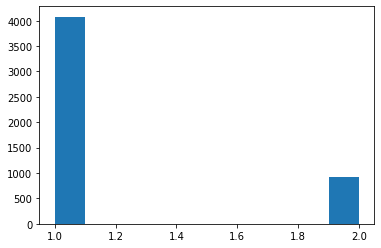

In [6]:
plt.hist(data.nilai)
plt.show()

In [7]:
data.nilai.value_counts()

1    4078
2     921
Name: nilai, dtype: int64

In [8]:
df = data[['data','nilai']]
df.head()

,data,nilai
0,vaksin jalan vaksinasi tahap giat vaksinasi la...,1
1,vaksinasi ilegal bayar rupiah vaksin covid ora...,2
2,abk positif covid varian india perintah priori...,1
3,pelihara vaksin rabies perintah alam,1
4,vaksin lambat target alas utama niscaya wacana...,2


In [9]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['data'],df['nilai'],test_size=0.2, random_state=0)

In [10]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [11]:
Test_Y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

<h1>TF-IDF</h1>

In [12]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df['data'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [13]:
Train_X_Tfidf.shape

(3999, 6590)

In [14]:
Train_Y.shape

(3999,)

In [15]:
print("TF-IDF ", type(Test_X_Tfidf), Train_X_Tfidf.shape)

TF-IDF  <class 'scipy.sparse._csr.csr_matrix'> (3999, 6590)


In [16]:
SVM = SVC()
cross_val_score(SVM,Train_X_Tfidf,Train_Y, cv=10)

array([0.8575    , 0.8625    , 0.8675    , 0.8575    , 0.875     ,
       0.8625    , 0.8475    , 0.865     , 0.8725    , 0.85964912])

In [17]:
cross_val_score(SVM,Train_X_Tfidf,Train_Y, cv=10).mean()

0.8627149122807017

<h1>Membandingkan Kernel</h1>
<h2>1.Linear</h2>

In [18]:
clf = SVC(kernel='linear', C=2.33)
clf.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.33, kernel='linear')

In [19]:
scores = cross_val_score(clf, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(clf,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.875      0.8625     0.8825     0.8775     0.9        0.87
 0.8625     0.8775     0.8725     0.87468672]
K-Fold Mean ->  0.8754686716791978


In [20]:
y_pred = clf.predict(Test_X_Tfidf)

In [21]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y)*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y)*100)

[[786  29]
 [ 88  97]]
SVM Accuracy Score ->  88.3
SVM Recall Score ->  76.98412698412699
SVM Precision Score ->  52.43243243243243
SVM f1 Score ->  62.37942122186496


<h2>2.Polynomial</h2>

In [22]:
poly = SVC(kernel='poly', C=2.33)
poly.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.33, kernel='poly')

In [23]:
scores = cross_val_score(poly, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.8375     0.86       0.8425     0.855      0.8575     0.85
 0.8425     0.8425     0.8625     0.84461153]
K-Fold Mean ->  0.8494611528822056


In [24]:
y_pred = poly.predict(Test_X_Tfidf)

In [25]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y)*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y)*100)

[[803  12]
 [133  52]]
SVM Accuracy Score ->  85.5
SVM Recall Score ->  81.25
SVM Precision Score ->  28.10810810810811
SVM f1 Score ->  41.76706827309237


<h2>3.Radial Basis Function</h2>

In [26]:
rbf = SVC(kernel='rbf', C=2.13, gamma=0.50 ).fit(Train_X_Tfidf,Train_Y)


In [27]:
scores = cross_val_score(rbf, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.8775     0.8725     0.8875     0.885      0.8975     0.875
 0.87       0.88       0.88       0.87719298]
K-Fold Mean ->  0.880219298245614


In [28]:
y_pred = rbf.predict(Test_X_Tfidf)

In [29]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y)*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y)*100)

[[798  17]
 [ 95  90]]
SVM Accuracy Score ->  88.8
SVM Recall Score ->  84.11214953271028
SVM Precision Score ->  48.64864864864865
SVM f1 Score ->  61.64383561643836


<h2>4.Sigmoid</h2>

In [30]:
sig = SVC(kernel='sigmoid', C=2.25)
sig.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.25, kernel='sigmoid')

In [31]:
scores = cross_val_score(sig, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.8625     0.8525     0.875      0.87       0.8975     0.8625
 0.865      0.8775     0.8625     0.87218045]
K-Fold Mean ->  0.869718045112782


In [32]:
y_pred = sig.predict(Test_X_Tfidf)

In [33]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y)*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y)*100)

[[779  36]
 [ 94  91]]
SVM Accuracy Score ->  87.0
SVM Recall Score ->  71.65354330708661
SVM Precision Score ->  49.18918918918919
SVM f1 Score ->  58.333333333333336


In [34]:
def classify(tweet):
    pred  = rbf.predict(Tfidf_vect.transform([tweet]))
    if pred == 1:
        return "Sentimen negatif"
    return "Sentimen positif"

In [35]:
classify('vaksin haram jangan mau')

'Sentimen negatif'

In [36]:
classify('ayo dukung vaksin pemerintah')

'Sentimen positif'

In [37]:
pickle.dump(rbf, open('iris.pkl', 'wb'))
pickle.dump(Tfidf_vect, open('vect.pkl', 'wb'))